In [1]:
import numpy as np

In [2]:
np.triu_indices(3)

(array([0, 0, 0, 1, 1, 2]), array([0, 1, 2, 1, 2, 2]))

In [4]:
def p(i,j,h,n=4):
    return x[i]*x[j]*y[h-n]/(1+x[i]*x[j]*y[h-n])

def dp(i,j,h,l,n=4):
    if l == i:
        return x[j]*y[h-n]/(1+x[i]*x[j]*y[h-n])**2
    elif l == j:
        return x[i]*y[h-n]/(1+x[i]*x[j]*y[h-n])**2
    elif l == h: 
        return x[i]*x[j]/(1+x[i]*x[j]*y[h-n])**2
    else:
        return 0

def get_block_pair(b1,b2,n=4):
    return np.sum(range(n-b1+1,n+1),dtype=int)+b2-b1
    
def f(n=4,m=2):
    mpairs = int(m*(m+1)/2)
    yf = [0 for i in range(n+mpairs)]
    for i in range(n):
        for j in range(i+1,n):
                _y = get_block_pair(b[i],b[j],m)
                yf[i] += p(i,j,n+_y)
                yf[j] += p(i,j,n+_y)
                yf[n+_y] += p(i,j,n+_y)
                # print(yf)
    return yf

def df(n=4,m=2):
    mpairs = int(m*(m+1)/2)
    yf = [[0 for i in range(n+mpairs)] for i in range(n+mpairs)]
    ###
    for l in range(n+mpairs):
        for i in range(n):
            for j in range(i+1,n):
                _y = get_block_pair(b[i],b[j],m)
                yf[i][l] += dp(i,j,n+_y,l)
                yf[j][l] += dp(i,j,n+_y,l)
                yf[n+_y][l] += dp(i,j,n+_y,l)
                # print(yf)
    return yf

In [5]:
n = 4
for b1 in range(n):
    for b2 in range(b1,n):
        print(b1,b2,'->',get_block_pair(b1,b2))

0 0 -> 0
0 1 -> 1
0 2 -> 2
0 3 -> 3
1 1 -> 4
1 2 -> 5
1 3 -> 6
2 2 -> 7
2 3 -> 8
3 3 -> 9


In [93]:
x = np.random.random(4)
y = np.random.random(3)    

In [115]:
x = [1/np.sqrt(3),2/np.sqrt(3),2/np.sqrt(3),1/np.sqrt(3)]
y = [3/2,1,3/2]

In [116]:
print(x)
print(y)

[0.5773502691896258, 1.1547005383792517, 1.1547005383792517, 0.5773502691896258]
[1.5, 1, 1.5]


In [120]:
x = [0.062, 591961.252, -46908.260, 0.001]
y = [1587316.443, 3.551, -158235.486]

In [6]:
x = [-435.4392411, 118.0335891, 168.5324370, 169.2811388]
y = [317.9180430, 266.7010047, 0.4812309]

In [7]:
b = [0,0,1,1]
k = [2,3,3,2,1,3,1]

In [119]:
with open('test_input.csv','w') as f_in:
    for ki,bi,xi in zip(k[:len(b)],b,x):
        print(ki,bi,xi, file=f_in)
    for ki,yi in zip(k[len(b):],y):
        print(ki,yi, file=f_in)

In [127]:
[a-b for a,b in zip(f(),k)]

[0.0004224201276832318,
 -0.00023346581375971454,
 -0.0002059403482372879,
 0.00038249311334226377,
 -1.4938608954073729e-05,
 0.0002188315318316647,
 -2.1139383363344422e-05]

In [114]:
# deriv = np.transpose(df())
deriv = df()
for line in deriv:
    print(' '.join([f'{c:0.3f}' for c in line]))

0.715 0.182 0.090 0.080 0.227 0.430 0.000
0.451 0.400 0.206 0.157 0.227 0.879 0.000
0.070 0.064 0.486 0.060 0.000 0.372 0.256
0.194 0.154 0.190 0.298 0.000 0.937 0.256
0.451 0.182 0.000 0.000 0.227 0.000 0.000
0.264 0.218 0.296 0.238 0.000 1.308 0.000
0.000 0.000 0.190 0.060 0.000 0.000 0.256


In [27]:
for l in range(6):
    print(df(l))

[0.2906595686326338, 0.2779079351454027, 0.24766619888146682, 0.16045065244828485, 0.24766619888146682, 0]
[0.2713295548434692, 0.3709523490720126, 0.4565160746954279, 0.09288291461002697, 0.4565160746954279, 0]
[0.5504067028097417, 0.6442975830942266, 0.4302498885831355, 0.3822271986604164, 0.4302498885831355, 0]
[0.5504067028097417, 0.6442975830942266, 0.4302498885831355, 0.3822271986604164, 0.4302498885831355, 0]
[0.5504067028097417, 0.6442975830942266, 0.4302498885831355, 0.3822271986604164, 0.4302498885831355, 0]
[0.5504067028097417, 0.6442975830942266, 0.4302498885831355, 0.3822271986604164, 0.4302498885831355, 0]


In [30]:
# solution with fixedpoint
x = -43.164113, 12.126683, 16.708968, 17.457709
y = 31.549822, 26.249326, 0.481231
x = np.exp([-c for c in x])
y = np.exp([-c for c in y])
print(x)
print(y)

[5.57103763e+18 5.41313040e-06 5.53843929e-08 2.61946931e-08]
[1.98649008e-14 3.98164526e-12 6.18022138e-01]


In [19]:
# init value
x = 0.5773502691896258, 1.1547005383792517, 1.1547005383792517, 0.5773502691896258
y = 1.5, 1, 1.5

In [21]:
# solution with solver
x = 0.001, 7348.987, 8690.473, 0.001
y = 9108.689, 622.547, 5443.210

In [31]:
m = 2
for i in range(n):
    for j in range(i+1,n):
        _y = get_block_pair(b[i],b[j],m)
        print(f'i:{i}, j:{j}, IJ:{_y}, p_ij:{p(i,j,n+_y)}')

i:0, j:1, IJ:0, p_ij:0.3746329525120092
i:0, j:2, IJ:1, p_ij:0.5512738746447138
i:0, j:3, IJ:1, p_ij:0.3675081127773742
i:1, j:2, IJ:1, p_ij:1.1937089584396553e-24
i:1, j:3, IJ:1, p_ij:5.645785427959465e-25
i:2, j:3, IJ:2, p_ij:8.966124109768482e-16


In [5]:
import numpy as np

In [11]:
def S(p):
    return -sum(i*np.log2(i) if i>0 else 0 for i in p)

In [12]:
def p(theta):
    

-0.0

In [135]:
## stochastic block model ##

nblocks = 3
size_range = [200,500]
sizes = np.random.randint(size_range[0],size_range[1],nblocks)
n = sizes.sum()
p = 0.45
q = 0.35

print('bloc size:', sizes)
blocks = [[] for _ in range(nblocks)]
b2b = []

for i in range(nblocks):
    aii = (np.random.rand(sizes[i],sizes[i]) < p) # High edge-density block
    aii[np.tril_indices(sizes[i])] = False
    aii = aii + aii.T
    blocks[i].append(aii)
    b2b.append(aii.sum()/2)
    for j in range(i+1,nblocks):
        aij = (np.random.rand(sizes[i],sizes[j]) < q) # Low edge-density block
        blocks[i].append(aij)
        aji = aij.T 
        blocks[j].append(aji)
        b2b.append(aij.sum())

b2b = np.asarray(b2b)
adjacency_matrix = np.bmat(blocks)  # Join blocks
adjacency_matrix = adjacency_matrix.astype(int)  # Force binary links
adjacency_matrix = np.asarray(adjacency_matrix)  # Format as np.ndarray instead of np.matrix

bloc size: [203 335 401]


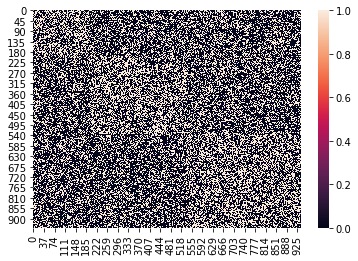

In [136]:
import seaborn as sns
sns.heatmap(adjacency_matrix)

In [137]:
adjacency_matrix.sum()/(n**2)

0.38609492118255095

In [138]:
# write to file 
degrees = adjacency_matrix.sum(axis=0)
L = b2b.sum()
print(degrees.sum()/2, L)
cs = np.cumsum([0]+sizes[:-1].tolist())
fname = f'test_input_{n}_{nblocks}.csv'
with open(fname,'w') as fout:
    for j,s in enumerate(sizes):
        for i in range(s):
            print(degrees[cs[j]+i], j, degrees[cs[j]+i]/np.sqrt(2*L), file=fout)
    for k in b2b:
        print(k, k/np.sqrt(2*L), file=fout)
print('data written on', fname)

170214.0 170214.0
data written on test_input_939_3.csv


adjacency matrix generated
number of nodes: 974
number of edges: 142508
density: 0.3007443268031512
data written on: test_graph_mode_0_nodes_974_blocks_3.csv
adjacency matrix plotted on: test_graph_mode_0_nodes_974_blocks_3.png


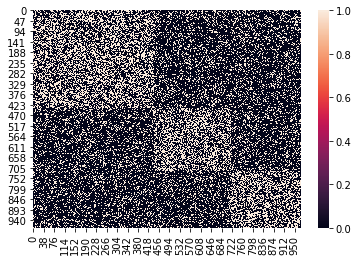

In [61]:
## block model generator##
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### PARAMS #####
# whether we want a homogeneous network (mode=0) or heterogeneous network (mode=1)
mode = 0
# number of blocks
nblocks = 3
# range for the size of each block (chosen randomly in the range)
size_range = [200,500]
# (approximate) density of the network
density = 0.3
# relative strength of intra-block connections with respect to inter-blocks
# if rel=1 intra- and inter-block connections are equally likely
# if rel>1 intra-block connections are more likely
# if rel<1 inter-block connections are more likely
rel = 2
# whether you want to plot the adjacency matrix
plot = True #False
##################

sizes = np.random.randint(size_range[0],size_range[1],nblocks)
n = sizes.sum()
intra = (sizes*(sizes-1)/2).sum()
tot = n*(n-1)/2
inter = tot-intra
q = tot/(intra*rel+inter)
p = rel*q
intradensity = p*density
interdensity = q*density

if mode==0:
    pintra = [intradensity for _ in range(n)]
    pinter = [interdensity for _ in range(n)]
else:
    gamma = intradensity/(1-intradensity)
    pintra = np.random.power(gamma,n)
    gamma = interdensity/(1-interdensity)
    pinter = np.random.power(gamma,n)

cs = np.cumsum([0]+sizes.tolist())
adjacency_matrix = np.zeros((n,n))
for j,s in enumerate(sizes):
    for i in range(s):
        pi = pintra[cs[j]+i]
        qi = pinter[cs[j]+i]
        adjacency_matrix[cs[j]+i,cs[j]+i:cs[j+1]] = np.random.choice(2,max(0,cs[j+1]-cs[j]-i),p=(1-pi,pi))
        adjacency_matrix[cs[j]+i,cs[j+1]:] = np.random.choice(2,n-cs[j+1],p=(1-qi,qi))
adjacency_matrix[np.tril_indices(n)] = 0
adjacency_matrix = adjacency_matrix + adjacency_matrix.T

L = int(adjacency_matrix.sum()/2)
print('adjacency matrix generated')
print('number of nodes:', n)
print('number of edges:', L)
print('density:', L/tot)

basename = f'test_graph_mode_{mode}_nodes_{n}_blocks_{nblocks}'

# compute degree and number of block2block links
degrees = adjacency_matrix.sum(axis=0)
b2b = []
for i1 in range(len(sizes)):
    b2b.append(adjacency_matrix[cs[i1]:cs[i1+1],cs[i1]:cs[i1+1]].sum()/2)
    for i2 in range(i1+1,len(sizes)):
        b2b.append(adjacency_matrix[cs[i1]:cs[i1+1],cs[i2]:cs[i2+1]].sum())
b2b = np.array(b2b)

# write to file 
with open(f'{basename}.csv','w') as fout:
    for j,s in enumerate(sizes):
        for i in range(s):
            print(degrees[cs[j]+i], j, degrees[cs[j]+i]/np.sqrt(2*L), file=fout)
    for k in b2b:
        print(k, k/np.sqrt(2*L), file=fout)
print('data written on:', f'{basename}.csv')
        
if plot:
    sns.heatmap(adjacency_matrix)
    plt.savefig(f'{basename}.png')
    print('adjacency matrix plotted on:', f'{basename}.png')

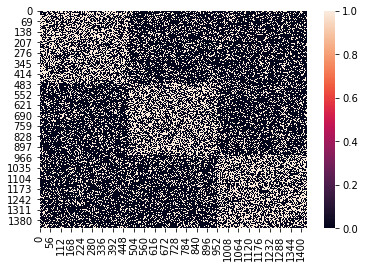

0.30008130887842377

598.0 598.0


In [89]:
adjacency_matrix[:38,:38].sum()

164.0

In [96]:
sum([adjacency_matrix[i,38:68].sum() for i in range(38,68)])

90.0

In [94]:
adjacency_matrix.sum()

916.0

In [7]:
np.random.randint(3,10,3)

array([3, 9, 3])

In [43]:
b2b

array([32, 15, 17])

In [76]:
np.arange(16).reshape((4,4))[0:[2,3]]

TypeError: slice indices must be integers or None or have an __index__ method

In [67]:
x

array([ 5,  6,  1,  1,  3,  4,  5,  2,  2, 41])